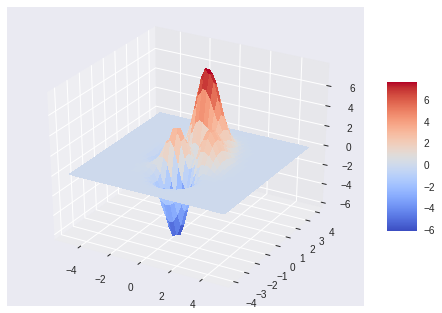

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import random
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize

e=2.71828

def fEval(x, y):
    return  3.0*(1-x)**2.0*e**(-(x**2)-(y+1)**2) - 10.0*(x/5-x**3-y**5)*e**(-x**2-y**2) - 1/3*e**(-(x+1)**2-y**2)

def objFunc1(params):
    x = params[0]
    y = params[1]
    return fEval(x,y)

def gradient(params):
    x = params[0]
    y = params[1]
    #Z =  3*(1-X).^2.*exp(-(X.^2)-(Y+1).^2) -  10*(X/5-X.^3-Y.^5).*exp(-X.^2-Y.^2)  -  1/3*exp(-(X+1).^2-Y.^2);
    return np.array([(-6*(1-x)-6*x*(1-x)**2)*e**(-(x**2)-(y+1)**2) - 10*(1/5-3*x**2 +(x/5 - x**3 - y**5)*(-2*x))*e**(-x**2-y**2) - 1/3*(-2*(x+1))*e**(-(x+1)**2-y**2),
        -6*(1+y)*((1-x)**2)*e**(-(x**2)-(y+1)**2) - 10*(-5*y**4    +(x/5 - x**3 - y**5)*(-2*y))*e**(-x**2-y**2) - 1/3*(-2*y)*e**(-(x+1)**2-y**2)])

X = np.linspace(-5, 5, 40)
Y = np.linspace(-4, 4, 30)
X, Y =np.meshgrid(X,Y)
Z=fEval(X,Y)

fig=plt.figure()
ax=fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

In [3]:
method='GradientDescent'
WhichStartingPoint='4'
choices={'1':[-1, 2.5], '2':[1,1], '3':[-2.5, 0.5], '4':[-1, -3]}
x_i=choices[WhichStartingPoint]
print('Starting point={}'.format(WhichStartingPoint))
print(x_i)

Starting point=4
[-1, -3]


Optimization terminated successfully.
         Current function value: -6.551147
         Iterations: 34
         Function evaluations: 67
x=0.22827829070563627,y=-1.6255352635486267,and z=-6.551146947983603


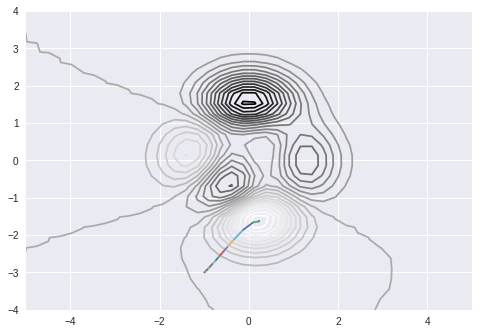

In [5]:
if method=='GradientDescent':
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z, 25)
    fmt = '%1.0f'
    g1=0.05
    nIters=300
    for i in range (nIters):
        x_pre = x_i
        x_i = x_i - g1 * gradient(x_i)
        plt.plot([x_pre[0],x_i[0]], [x_pre[1],x_i[1]])

method='Simplex'

if method=='Simplex':
    tol=1e-6
    params=x_i
    params = scipy.optimize.fmin(objFunc1, params, xtol=tol, ftol=tol, maxiter=500, maxfun=5000)
    print("x={},y={},and z={}".format(params[0], params[1], fEval(params[0], params[1])))


plt.show()

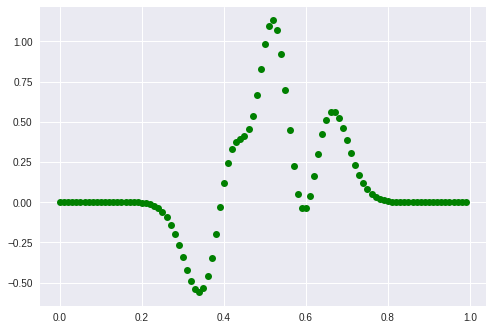

In [6]:
# Visulaization( for higher dimensional cases

params_1=[-4.0, 4.0]
params_2=[4.0, -4.0]

# params_1=[4.0, -3.0]
# params_2=[-3.0, 4.0]


alpha=np.arange(0, 1, 0.01)
len3 = alpha.size
lossValues = np.zeros((len3, 1), np.float64)
x_Tmp=[0.0,0.0]

for k in range (len3):
    x_Tmp[0] = + alpha[k] * params_1[0]+(1.0 - alpha[k]) * params_2[0]
    x_Tmp[1] = + alpha[k] * params_1[1]+(1.0 - alpha[k]) * params_2[1] 
    lossValues[k] = objFunc1(x_Tmp)

plt.plot(alpha, lossValues, 'go')
plt.show()
